In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enocder = OneHotEncoder()
enocder.fit([[0], [1]])
# 0 - Tumor
# 1 - not tumor

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
data = []
paths = []
result = []

for r, d, f in os.walk('/content/drive/MyDrive/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if (img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(enocder.transform([[0]]).toarray())
      

In [ ]:
paths = []
for r, d, f in os.walk('/content/drive/MyDrive/brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if (img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(enocder.transform([[1]]).toarray())         
 

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
print(result.shape)
result = result.reshape(139, 2)


(139, 1, 2)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

In [ ]:
x_train.shape, y_train.shape

((111, 128, 128, 3), (111, 2))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=40, batch_size=40, verbose=1, validation_split=0.2, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/40
3/3 [==============================] - 7s 2s/step - loss: 27.7079 - accuracy: 0.5071 - val_loss: 66.3256 - val_accuracy: 0.7391
Epoch 2/40
3/3 [==============================] - 5s 1s/step - loss: 16.9572 - accuracy: 0.6727 - val_loss: 36.9386 - val_accuracy: 0.6522
Epoch 3/40
3/3 [==============================] - 5s 1s/step - loss: 7.3501 - accuracy: 0.7972 - val_loss: 8.0915 - val_accuracy: 0.6957
Epoch 4/40
3/3 [==============================] - 5s 1s/step - loss: 2.4778 - accuracy: 0.8563 - val_loss: 31.7932 - val_accuracy: 0.5217
Epoch 5/40
3/3 [==============================] - 5s 1s/step - loss: 7.0042 - accuracy: 0.7489 - val_loss: 14.9473 - val_accuracy: 0.6087
Epoch 6/40
3/3 [==============================] - 5s 1s/step - loss: 1.9387 - accuracy: 0.8983 - val_loss: 39.1025 - val_accuracy: 0.5217
Epoch 7/40
3/3 [==============================] - 5s 1s/step - loss: 2.5059 - accuracy: 0.8568 - val_loss: 15.3611 - val_accuracy: 0.6087
Epoch 8/40
3/3 [=================

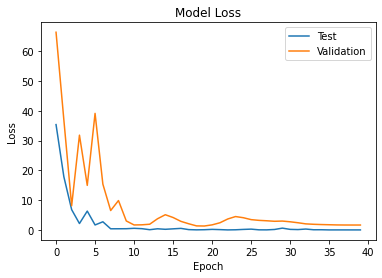

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()
plt.savefig('brain_tumor_loss.png')

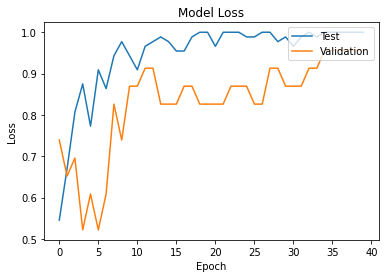

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()
plt.savefig('brain_tumor_accuracy.png')

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [ ]:
img = Image.open("/content/drive/MyDrive/brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
print(res)
classification = np.where(res == np.amax(res))[1][0]
print(classification)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

[[0. 1.]]
1
100.0% Confidence This Is No, Its not a tumor


In [ ]:
img = Image.open("/content/drive/MyDrive/brain_tumor_dataset/yes/Y155.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
print(res)
classification = np.where(res == np.amax(res))[1][0]
print(classification)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

[[1. 0.]]
0
100.0% Confidence This Is Its a Tumor


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/brain_tumor_mymdel.h5')

In [ ]:
from keras.models import load_model
 
model = load_model('brain_tumor_mymdel.h5')
new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
